In [29]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from time import time
seed = 903966526
clf = KNeighborsClassifier()

In [30]:
# prep data
df = pd.read_csv('adult.csv')
X = df.drop(columns={"income"},axis=1)
y = df["income"].values.reshape(-1,1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [31]:
#learning curve
lc_size = [x / 100.0 for x in range(1, 101, 2)]
_, lc_train, lc_test = learning_curve(
    estimator= clf,
    X= X,
    y= y,
    train_sizes= lc_size,
    scoring= 'accuracy',
    n_jobs= -1
)
lc_train = np.mean(lc_train, axis=1)
lc_test = np.mean(lc_test, axis=1)

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vect

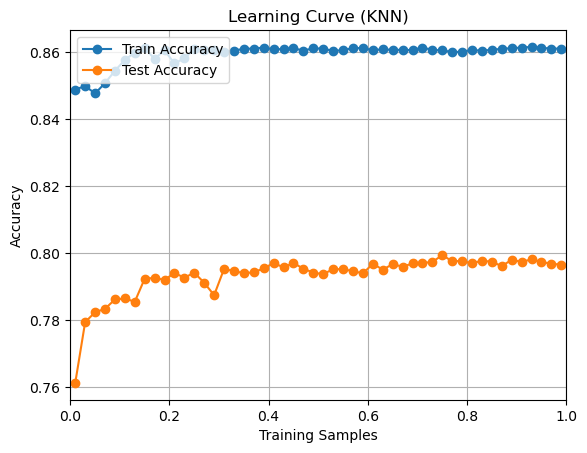

In [32]:
#learning curve graph
plt.plot(lc_size, lc_train, label='Train Accuracy', linestyle='-', marker='o')
plt.plot(lc_size, lc_test, label='Test Accuracy', linestyle='-', marker='o')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (KNN)')
plt.legend(loc='upper left')
plt.xlim(0,1)
plt.grid(True)
plt.savefig('images/knn_learncurve.png')
plt.show()
plt.close()

In [33]:
#validation curve - n
n_neighbors = range(1, 201, 10)
vc_n_train, vc_n_test = validation_curve(
    estimator= clf,
    X= X,
    y= y,
    param_name= 'n_neighbors',
    param_range= n_neighbors,
    scoring= 'accuracy',
    n_jobs= -1
)
vc_n_train = np.mean(vc_n_train, axis=1)
vc_n_test = np.mean(vc_n_test, axis=1)

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vect

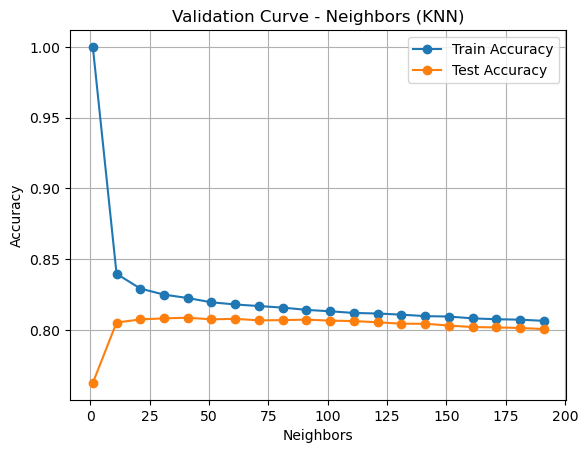

In [34]:
#validation curve curve - n graph
plt.plot(n_neighbors, vc_n_train, label= 'Train Accuracy', linestyle='-', marker='o')
plt.plot(n_neighbors, vc_n_test, label= 'Test Accuracy', linestyle='-', marker='o')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Neighbors (KNN)')
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig('images/knn_valcurve_n.png')
plt.show()
plt.close()

In [35]:
#validation curve - p
p = range(1, 11)
vc_p_train, vc_p_test = validation_curve(
    estimator= clf,
    X= X,
    y= y,
    param_name= 'p',
    param_range= p,
    scoring= 'accuracy',
    n_jobs= -1
)
vc_p_train = np.mean(vc_p_train, axis=1)
vc_p_test = np.mean(vc_p_test, axis=1)

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vect

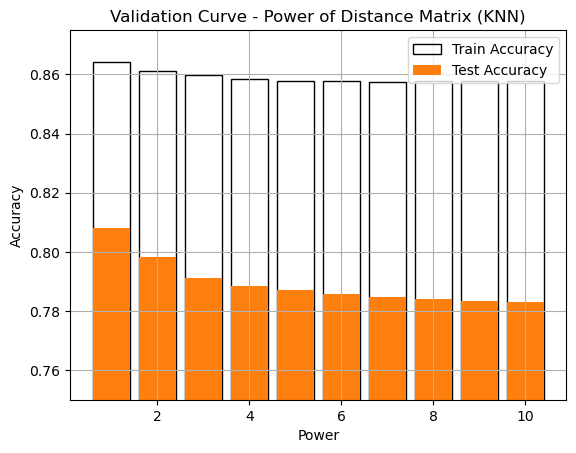

In [36]:
#validation curve curve - algo graph
plt.bar(p, vc_p_train, label= 'Train Accuracy', fill=False)
plt.bar(p, vc_p_test, label= 'Test Accuracy')
plt.xlabel('Power')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Power of Distance Matrix (KNN)')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim(0.75, 0.875)
plt.savefig('images/knn_valcurve_p.png')
plt.show()
plt.close()

In [37]:
# parameter optimization
param = {
    'n_neighbors': n_neighbors,
    'p': p,
}
grid = GridSearchCV(
    estimator= clf,
    param_grid= param, 
    scoring= 'accuracy', 
    n_jobs=-1
)
grid.fit(X_train, y_train)

optimal = grid.best_estimator_
test_score = optimal.score(X_test, y_test)

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vect

In [38]:
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Cross-validation score: {grid.best_score_}')
print(f'Test Accuracy: {test_score}')

Best Parameters: {'n_neighbors': 61, 'p': 1}
Best Cross-validation score: 0.8199695754390817
Test Accuracy: 0.825533797986503


In [39]:
start = time()
final = KNeighborsClassifier(**grid.best_params_, n_jobs=-1)
final.fit(X_train, y_train)
pred = final.predict(X_test)
end = time()
duration = end - start
print(f'Train duration: {duration}s')

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train duration: 0.9367258548736572s
